<a href="https://colab.research.google.com/github/Rab27/ML-/blob/main/olympic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
x= pd.read_csv('/content/athlete_events.csv')

In [ ]:
region=pd.read_csv('/content/noc_regions (1).csv')

In [ ]:
x.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Frist
1,  
Merge DataFrames: Combine the `x` and `region` DataFrames to enrich the athlete data with region information.

In [ ]:

# Assuming x and region are already loaded DataFrames
merged_df = x.merge(region, on='NOC', how='left')

2. Inspect Merged Data: Check the first few rows to ensure the merge was successful.

In [ ]:
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


3. Handle Missing Values: Identify and decide how to handle missing values in key columns like `Age`, `Height`, `Weight`, and `Medal`.

In [ ]:
# Fill missing numeric values with the mean or median

merged_df['Age'].fillna(merged_df['Age'].mean(), inplace=True)
merged_df['Height'].fillna(merged_df['Height'].mean(), inplace=True)
merged_df['Weight'].fillna(merged_df['Weight'].mean(), inplace=True)

# For categorical columns like 'Medal', you might fill with 'None' or leave as NaN

merged_df['Medal'].fillna('None', inplace=True)

<ipython-input-245-691bd639f240>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Age'].fillna(merged_df['Age'].mean(), inplace=True)
<ipython-input-245-691bd639f240>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

4. Analyze Medal Distribution: Calculate the total number of medals by region and sport.

In [ ]:
medal_counts_by_region = merged_df.groupby('region')['Medal'].value_counts().unstack().fillna(0)
print(medal_counts_by_region)

medal_counts_by_sport = merged_df.groupby('Sport')['Medal'].value_counts().unstack().fillna(0)
print(medal_counts_by_sport)

Medal                    Bronze  Gold   None  Silver
region                                              
Afghanistan                 2.0   0.0  124.0     0.0
Albania                     0.0   0.0   70.0     0.0
Algeria                     8.0   5.0  534.0     4.0
American Samoa              0.0   0.0   37.0     0.0
Andorra                     0.0   0.0  169.0     0.0
...                         ...   ...    ...     ...
Virgin Islands, British     0.0   0.0   45.0     0.0
Virgin Islands, US          0.0   0.0  293.0     1.0
Yemen                       0.0   0.0   48.0     0.0
Zambia                      1.0   0.0  181.0     1.0
Zimbabwe                    1.0  17.0  301.0     4.0

[205 rows x 4 columns]
Medal             Bronze   Gold    None  Silver
Sport                                          
Aeronautics          0.0    1.0     0.0     0.0
Alpine Skiing      141.0  143.0  8401.0   144.0
Alpinism             0.0   25.0     0.0     0.0
Archery             98.0  135.0  1981.0   120.0


5. Visualize Key Insights: Use plots to visualize important findings, such as the distribution of medals by region or sport.

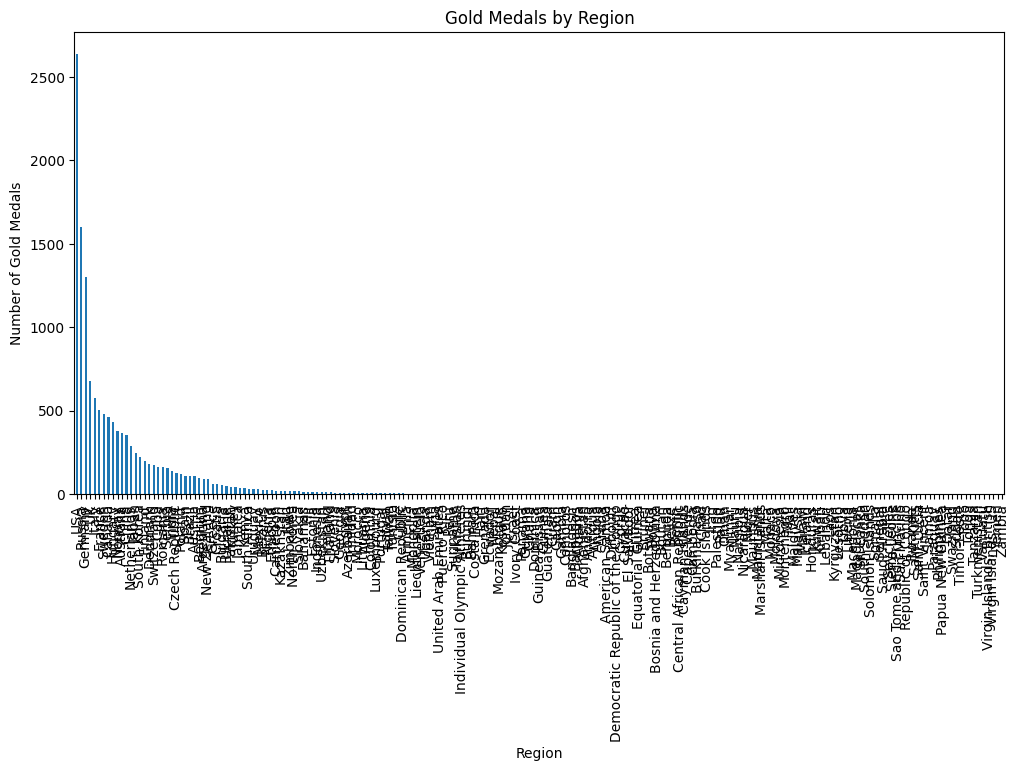

In [ ]:
import matplotlib.pyplot as plt

# Plotting gold medals by region
gold_medals_by_region = medal_counts_by_region['Gold']
gold_medals_by_region.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Gold Medals by Region')
plt.xlabel('Region')
plt.ylabel('Number of Gold Medals')
plt.show()

6, Assuming merged_df is your DataFrame after merging with region
 Create new columns for each medal type

Kno we use Gold,Silver and Bronze as data_future.  it help analysis to easily

In [ ]:
merged_df['Medal'].value_counts()

,count
Medal,
None,231333
Gold,13372
Bronze,13295
Silver,13116


In [ ]:
merged_df['Gold'] = merged_df['Medal'].apply(lambda x: 1 if x == 'Gold' else 0)

merged_df['Silver'] = merged_df['Medal'].apply(lambda x: 1 if x == 'Silver' else 0)

merged_df['Bronze'] = merged_df['Medal'].apply(lambda x: 1 if x == 'Bronze' else 0)

In [ ]:
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Gold,Silver,Bronze
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN,0,0,0


7,

In [ ]:
merged_df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,URS,1082,732,689
2,GER,745,674,746
3,GBR,678,739,651
4,ITA,575,531,531
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


8,

In [ ]:
merged_df = merged_df.drop_duplicates(subset=['Team', 'NOC',  'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [ ]:
merged_df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending = False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,1131,901,792
1,URS,471,373,353
2,GER,321,345,341
3,GBR,289,321,312
4,FRA,265,287,334
...,...,...,...,...
225,WIF,0,0,2
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [ ]:
years = merged_df['Year'].unique ().tolist()
years.sort()
years.insert(0,'overall')
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [ ]:
country = merged_df['region'].unique().tolist()
country = [str(item) for item in country]
country.sort()
country.insert(0,'overall')
country

['overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [ ]:
def fetch_merged_df(year, country):
    if year == 'Overall' and country == 'Overall':
        temp_df = merged_df
    elif year == 'Overall' and country != 'Overall':
        temp_df = merged_df[merged_df['region'] == country]
    elif year != 'Overall' and country == 'Overall':
        temp_df = merged_df[merged_df['Year'] == int(year)]
    else:  # year != 'Overall' and country != 'Overall'
        temp_df = merged_df[(merged_df['Year'] == int(year)) & (merged_df['region'] == country)]

    # Group and sort the data
    x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values("Gold", ascending=False).reset_index()
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

In [ ]:
fetch_merged_df(year='Overall',country='USA')

  region  Gold  Silver  Bronze  total
0    USA  1131     901     792   2824


In [ ]:
fetch_merged_df('Overall',country ='Overall')

                      region  Gold  Silver  Bronze  total
0                        USA  1131     901     792   2824
1                     Russia   727     600     589   1916
2                    Germany   580     592     597   1769
3                         UK   289     321     312    922
4                     France   265     287     334    886
..                       ...   ...     ...     ...    ...
200                  Vanuatu     0       0       0      0
201  Virgin Islands, British     0       0       0      0
202       Virgin Islands, US     0       1       0      1
203                    Yemen     0       0       0      0
204                   Zambia     0       1       1      2

[205 rows x 5 columns]


     Overall  Analysis
- Number of edition
- Number of cities
- Number of ovent/sports
- Number of athletes

In [ ]:
merged_df. head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Gold,Silver,Bronze
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Netherlands,NaN,0,0,0


Number of edition

In [ ]:
merged_df['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1972, 1936, 1956, 1928, 1976, 2010, 1906, 1904,
       1908, 1896])

In [ ]:
years = merged_df['Year'].unique ().tolist()
years.sort()
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016]

In [ ]:
merged_df['Year'].unique().shape

(35,)

Number of cities

In [ ]:
merged_df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [ ]:
cities = merged_df['City'].unique().tolist()
cities = [str(item) for item in cities]
cities.sort()
cities

['Albertville',
 'Amsterdam',
 'Antwerpen',
 'Athina',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Calgary',
 'Chamonix',
 "Cortina d'Ampezzo",
 'Garmisch-Partenkirchen',
 'Grenoble',
 'Helsinki',
 'Innsbruck',
 'Lake Placid',
 'Lillehammer',
 'London',
 'Los Angeles',
 'Melbourne',
 'Mexico City',
 'Montreal',
 'Moskva',
 'Munich',
 'Nagano',
 'Oslo',
 'Paris',
 'Rio de Janeiro',
 'Roma',
 'Salt Lake City',
 'Sankt Moritz',
 'Sapporo',
 'Sarajevo',
 'Seoul',
 'Sochi',
 'Squaw Valley',
 'St. Louis',
 'Stockholm',
 'Sydney',
 'Tokyo',
 'Torino',
 'Vancouver']

In [ ]:
merged_df['City'].unique().shape

(42,)

- Number of ovent/sports

In [ ]:
merged_df['Event'].unique().shape

(765,)

In [ ]:
Sport =merged_df['Sport'].unique().tolist()
Sport = [str(item) for item in Sport]
Sport.sort()
Sport

['Aeronautics',
 'Alpine Skiing',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cross Country Skiing',
 'Curling',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Freestyle Skiing',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Luge',
 'Military Ski Patrol',
 'Modern Pentathlon',
 'Motorboating',
 'Nordic Combined',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboarding',
 'Softball',
 'Speed Skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'

In [ ]:
merged_df['Sport'].unique().shape

(66,)

- Number of athletes

In [ ]:
athletes = merged_df['Name'].unique()
athletes = [str(item) for item in athletes]
athletes.sort()
athletes

[' Jean Hauptmanns',
 ' Luis ngel Fernando de los Santos Grossi',
 ' Th Anh',
 ' Th Ngn Thng',
 ' Tin Tun',
 'A Dijiang',
 'A Lamusi',
 'A. Abdul Razzak',
 'A. Brun',
 'A. Buydens',
 'A. Dubois',
 'A. G. Chagale',
 'A. Germaine Golding (Regnier-)',
 'A. Hussain Ahmed',
 'A. J. Tyronne Benildus "Benny" Fernando',
 'A. Kordonis',
 'A. Tark Erilmez',
 'A. W. Nancy "Nan" Rae',
 'A. efik',
 'Aadam Ismaeel Khamis',
 'Aadjijatmiko Finarsih H.',
 'Aadolf Fredrik Svanstrm',
 'Aage Albert Leidersdorff',
 'Aage Avaldorff Meyer',
 'Aage Berntsen',
 'Aage Birch',
 'Aage Brge Poulsen',
 'Aage Emil Brix',
 'Aage Ernst Larsen',
 'Aage Even Hellstrm',
 'Aage Hermann',
 'Aage Hy Pedersen',
 'Aage Ingvar Eriksen',
 'Aage Jrgen Christian Andersen',
 'Aage Justesen',
 'Aage Sigfried Madsen',
 'Aage Torstein Wetteland Steen',
 'Aage Ulrik Jensen',
 'Aage Vilhelm Holm',
 'Aagje "Ada" Kok (-van der Linden)',
 'Aagje Vanwalleghem',
 'Aagot Norman',
 'Aale Maria Tynni (-Pirinen, -Haavio)',
 'Aaltje Grietje "Ali

In [ ]:
merged_df['Name'].unique().shape

(71796,)